In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [71]:
# 확률: 특정 사건이 발생하는 빈도 / 전체 발생가능한 경우의 수

# 주사위를 3번 던져 나올 수 있는 모든 경우의 수: 6, 6, 6 == 6**3

# 1에서부터 6까지 숫자가 적힌 공이 든 박스에서 3개의 공을 꺼낼 때 
# 나올 수 있는 모든 경우의 수 6, 5, 4 == 6*5*4
# -- without replacement : perm, combi

# 1에서부터 6까지 숫자가 적힌 공이 든 박스에서 3개의 공을 꺼내면서
# 꺼낸공을 다시 집어널고, 섞어서 뽑았을 때 나올수 있는 모든 경우의 수 == 6*6*6
# -- with replacement

In [72]:
# permutation (순열) : 순서개념 있음 ex. (a, b, c) != (b, c, a) 
# --without replacement

# 3개의 숫자를 정렬하는 방법의 갯수 : 3 * 2 * 1 
# n개의 숫자를 정렬하는 방법의 갯수 --> n!(n 펙토리얼)

# 1에서 부터 6까지 숫자 중 2개를 정렬하는 방법의 갯수 n : (6*5*4*3*2*1)/(4*3*2*1) == n!/(n-r)!

# n = 6
# r = 2

# n! 

In [73]:
# 순열 구하는 방법

def fact_1(n):
    ret_value = 1
    values = [x for x in range(n+1)] # stop가 n에서 걸리게 하기 위해 n+1을 범위에 둔다.
    for i in values[1:]:
        ret_value = ret_value * i
    return ret_value

def fact_2(n):
    ret_value = 1
    values = [x for x in range(n+1)] # stop가 n에서 걸리게 하기 위해 n+1을 범위에 둔다.
    for i in range(n):
        ret_value = ret_value * (i+1)
    return ret_value

def fact_3(n):
    ret_value = 1
    while n>1:
        ret_value = ret_value * n
        n = n-1
    return ret_value

def fact_r(n):    # recursive, 재귀함수: 자기가 자기자신을 부르는(call) 함수
    if n==2:
        return n
    return n * fact_r(n-1)  # n! = n*(n-1)

def fact_np(n):
    return np.arange(2, n+1).prod() # 그 안의 수를 전부 곱해주는 메소드 prod()

fact_np(6)

def perm(n, r): # n은 총 갯수, r은 몇개를 고르는지
    return fact_np(n)/fact_np(n-r)

In [74]:
# combination (조합) : 순열에서 구성이 같은 것을 제외, 순서의 개념이 없음 (1, 6), (6, 1) --> 같은 것 1개로 count

# permutation / r! : 순서는 다르고, 구성은 같은 것 제외

# n! / r!(n-r)!
def combi(n, r):
    return perm(n,r)/fact_np(r)

In [75]:
# 함수 test 돌렸을 때 오류가 안나면 함수가 잘 구성되었다는 것이다.
assert perm(6,2) == 30.0
assert perm(6,3) == 120.0
assert combi(6,2) == 15.0

In [76]:
def count_with_replacement_order(pool, sel_count):  # all
    if sel_count == 1:
        return len(pool), [[x] for x in pool]
    a, b = count_with_replacement_order(pool, sel_count-1)
    r = []
    for x in pool:
        for b_i in b:
            r.append(b_i+[x])
    return len(r), r    

def perm_pool(pool, r):
    if r == 1:
        return len(pool), [[x] for x in pool]
    ret = []
    for x in pool:
        pool_copy = [y for y in pool]
        pool_copy.remove(x)
        a, b = perm_pool(pool_copy, r-1)
        for b_i in b:
            ret.append(b_i+[x])
    return len(ret), ret

def combi_pool(pool, r):
    a , b = perm_pool(pool, r)
    r = []
    for b_i in b:
        r.append(set(b_i))
    f = []
    for r_i in r:
        if r_i not in f:
            f.append(r_i)
    return len(f), f


In [77]:
count_with_replacement_order(list('abcdef'),3) # 꺼내고 다시 집어넣고, 다시 뽑는 경우의 수, 순서 상관 있음

(216,
 [['a', 'a', 'a'],
  ['b', 'a', 'a'],
  ['c', 'a', 'a'],
  ['d', 'a', 'a'],
  ['e', 'a', 'a'],
  ['f', 'a', 'a'],
  ['a', 'b', 'a'],
  ['b', 'b', 'a'],
  ['c', 'b', 'a'],
  ['d', 'b', 'a'],
  ['e', 'b', 'a'],
  ['f', 'b', 'a'],
  ['a', 'c', 'a'],
  ['b', 'c', 'a'],
  ['c', 'c', 'a'],
  ['d', 'c', 'a'],
  ['e', 'c', 'a'],
  ['f', 'c', 'a'],
  ['a', 'd', 'a'],
  ['b', 'd', 'a'],
  ['c', 'd', 'a'],
  ['d', 'd', 'a'],
  ['e', 'd', 'a'],
  ['f', 'd', 'a'],
  ['a', 'e', 'a'],
  ['b', 'e', 'a'],
  ['c', 'e', 'a'],
  ['d', 'e', 'a'],
  ['e', 'e', 'a'],
  ['f', 'e', 'a'],
  ['a', 'f', 'a'],
  ['b', 'f', 'a'],
  ['c', 'f', 'a'],
  ['d', 'f', 'a'],
  ['e', 'f', 'a'],
  ['f', 'f', 'a'],
  ['a', 'a', 'b'],
  ['b', 'a', 'b'],
  ['c', 'a', 'b'],
  ['d', 'a', 'b'],
  ['e', 'a', 'b'],
  ['f', 'a', 'b'],
  ['a', 'b', 'b'],
  ['b', 'b', 'b'],
  ['c', 'b', 'b'],
  ['d', 'b', 'b'],
  ['e', 'b', 'b'],
  ['f', 'b', 'b'],
  ['a', 'c', 'b'],
  ['b', 'c', 'b'],
  ['c', 'c', 'b'],
  ['d', 'c', 'b'],
  ['e'

In [78]:
perm_pool(list('abcdef'), 3) # 꺼내고 다시 집어넣지 않는 것, 순서 상관 있음

(120,
 [['c', 'b', 'a'],
  ['d', 'b', 'a'],
  ['e', 'b', 'a'],
  ['f', 'b', 'a'],
  ['b', 'c', 'a'],
  ['d', 'c', 'a'],
  ['e', 'c', 'a'],
  ['f', 'c', 'a'],
  ['b', 'd', 'a'],
  ['c', 'd', 'a'],
  ['e', 'd', 'a'],
  ['f', 'd', 'a'],
  ['b', 'e', 'a'],
  ['c', 'e', 'a'],
  ['d', 'e', 'a'],
  ['f', 'e', 'a'],
  ['b', 'f', 'a'],
  ['c', 'f', 'a'],
  ['d', 'f', 'a'],
  ['e', 'f', 'a'],
  ['c', 'a', 'b'],
  ['d', 'a', 'b'],
  ['e', 'a', 'b'],
  ['f', 'a', 'b'],
  ['a', 'c', 'b'],
  ['d', 'c', 'b'],
  ['e', 'c', 'b'],
  ['f', 'c', 'b'],
  ['a', 'd', 'b'],
  ['c', 'd', 'b'],
  ['e', 'd', 'b'],
  ['f', 'd', 'b'],
  ['a', 'e', 'b'],
  ['c', 'e', 'b'],
  ['d', 'e', 'b'],
  ['f', 'e', 'b'],
  ['a', 'f', 'b'],
  ['c', 'f', 'b'],
  ['d', 'f', 'b'],
  ['e', 'f', 'b'],
  ['b', 'a', 'c'],
  ['d', 'a', 'c'],
  ['e', 'a', 'c'],
  ['f', 'a', 'c'],
  ['a', 'b', 'c'],
  ['d', 'b', 'c'],
  ['e', 'b', 'c'],
  ['f', 'b', 'c'],
  ['a', 'd', 'c'],
  ['b', 'd', 'c'],
  ['e', 'd', 'c'],
  ['f', 'd', 'c'],
  ['a'

In [79]:
combi_pool(list('abcdef'), 3) # 순서 상관 없음, 중복을 포함하지 않기 위해 set을 사용

(20,
 [{'a', 'b', 'c'},
  {'a', 'b', 'd'},
  {'a', 'b', 'e'},
  {'a', 'b', 'f'},
  {'a', 'c', 'd'},
  {'a', 'c', 'e'},
  {'a', 'c', 'f'},
  {'a', 'd', 'e'},
  {'a', 'd', 'f'},
  {'a', 'e', 'f'},
  {'b', 'c', 'd'},
  {'b', 'c', 'e'},
  {'b', 'c', 'f'},
  {'b', 'd', 'e'},
  {'b', 'd', 'f'},
  {'b', 'e', 'f'},
  {'c', 'd', 'e'},
  {'c', 'd', 'f'},
  {'c', 'e', 'f'},
  {'d', 'e', 'f'}])

In [80]:
# 확률 분포

# 동전을 한번 던져 나올수 있는 확룰의 분포
# 앞 : 1/2, 뒤 : 1/2

# 동전을 두번 던져 나올 수 있는 경우의 확률 분포
# (앞,앞), (앞,뒤), (뒤,앞), (뒤,뒤)
#  각각의 확률 1/4
# 앞의 값 : 0, 뒤의 값 : 1이라고 할때의 분포
#    0         1        2    <--- 확률분포 x 축 : 확률변수, 확률변수가 가질 수 잇는 값.
#   1/4       1/2      1/4

[[0 0]
 [1 0]
 [0 1]
 [1 1]]


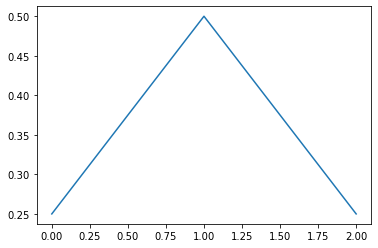

In [81]:
# 동전을 두 번 던졌을 때의 확률 분포
x = count_with_replacement_order([0,1], 2)
x_array = np.array(x[1])
print(x_array)
x_array_sum = np.sum(x_array, axis=1) # 가로축으로 더 하고,
val, cnt = np.unique(x_array_sum, return_counts = True) # 같은 것 끼리 묶고,

_, axe = plt.subplots()
axe.plot(val, cnt/x[0])

216


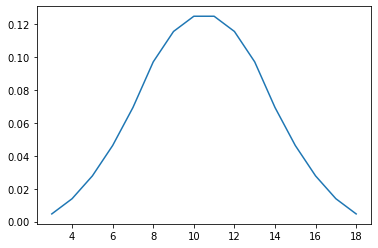

In [82]:
# [주사위를 3번 던져 나온 숫자의 합] 의 확률 분포
total_count, counts = count_with_replacement_order([x for x in range(1, 7)], 3)
print(total_count)

count_np = np.array(counts)
pass1 = np.sum(count_np, axis = 1)
pass2 = np.unique(pass1, return_counts = True)

_,axe = plt.subplots()
axe.plot(pass2[0], pass2[1]/total_count)

5.0 1.5811388300841898


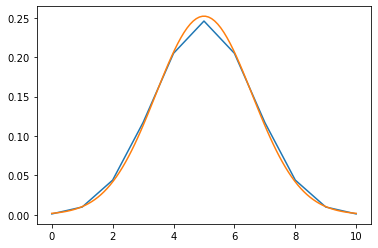

In [90]:
# 동전을 10번 던져 (앞 0, 뒤 1) 나올 수 있는 합의 확률 분포
total_cnt, s = count_with_replacement_order([0,1], 10)
s_array = np.array(s)
pass3 = np.sum(s_array, axis = 1)
#print(pass3, len(pass3))
pass4 = np.unique(pass3, return_counts = True)

_, axe = plt.subplots()
axe.plot(pass4[0], pass4[1]/total_cnt)

t_mean = np.mean(pass3)
t_std = np.std(pass3)
print(t_mean, t_std)

xs = np.linspace(0, 10, 100)
ys = stats.norm.pdf(xs, scale=t_std, loc = t_mean) #scale : 폭, loc
axe.plot(xs, ys)

In [84]:
# 동전을 던져, 앞면이 나오면 100원을 주고,
# 뒷면이 나오면 100원을 받기로 함.

# 10번을 던져, 앞면이 8번 나옴.
# 친구 : 동전이 조작되지 않음          <---- 귀무가설 : 5%보다 작으면 귀무가설이 기각, 5%를 넘어서게 되면 귀무가설을 채택
#  나 : 동전이 아무래도 조작된 것 같다. <---- 대립가설
# 유의수준 : 5%에서 결정하자 : alpha값 <-- p-value값

#print(pass4[0])
#print(pass4[1]/total_cnt) # 8부터 10까지를 더해서 유의수준을 판별한다.
prob = pass4[1]/total_cnt
print(np.sum(prob[-3:])) # 0.0546875이므로, 귀무가설을 채택한다.(던지다 보니 그렇게 나올 수 있다 라는 것이다.)
                         # 만약 0.05보다 작을 경우에 귀무가설 기각, 대립가설 채택 (이상하다 동전에 조작이 된거 같다, 재조사가 필요하다.)

0.0546875


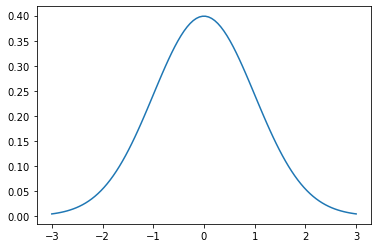

In [85]:
# 정규분포

xs = np.linspace(-3, 3, 100)
ys = stats.norm.pdf(xs)
_, axe = plt.subplots()
axe.plot(xs, ys)

0.016203703703703703


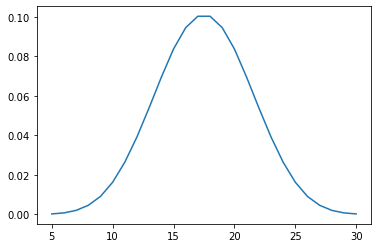

In [110]:
# 주사위를 5번 던졌을 때
# 합이 25가 될 확률
# 합이 25보다 크면, 100원을 받기로 한다. 합이 25보다 클 확률은(25 불포함)
total_ct, e = count_with_replacement_order([i for i in range(1,7)], 5)
e_array = np.array(e)
pass5 = np.sum(e_array, axis = 1)
pass6 = np.unique(pass5, return_counts = True)

#pass_zip=zip(pass6[0], total_prob)
#print(pass6[0])
#print(pass6[1])

total_prob = pass6[1]/total_ct

_, axe = plt.subplots()
axe.plot(pass6[0], total_prob)

print(np.sum(total_prob[-5:]))